In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Features + Housing prices for homes in california
cali = pd.read_csv('/content/drive/My Drive/DATA/california_housing_sklearn.csv')

In [ ]:
cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# In units of 100,000
cali['SalePrice']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: SalePrice, Length: 20640, dtype: float64

In [ ]:
# Check for null values
cali.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
SalePrice     0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

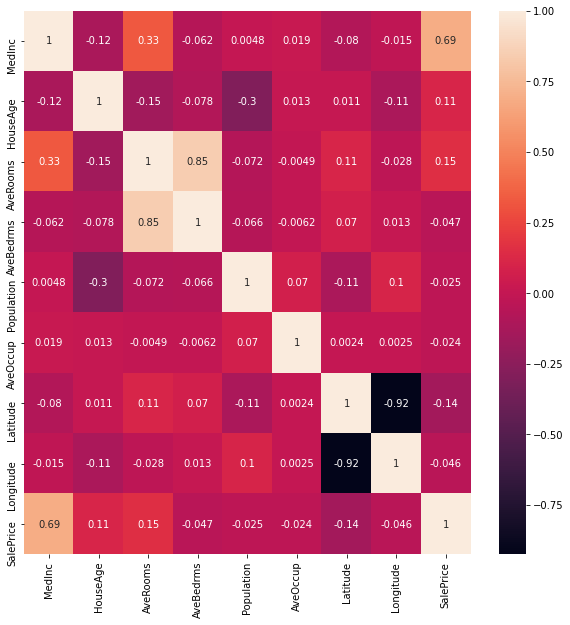

In [ ]:
# Correlation matrix
corr = cali.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [ ]:
# Getting data ready for splitting and scaling
X = cali.drop('SalePrice',axis=1)
y = cali['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Transforming and fitting in one line:
X_train = scaler.fit_transform(X_train)

In [ ]:
# Transform but don't fit on test set
X_test = scaler.transform(X_test)

In [ ]:
X_test.shape[1]

8

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
# Creating a sequential model
model = Sequential()

# Base # of neurons from size of feature data (# of features)

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(X_train.shape[1],activation='relu'))

# Final layer: Outputs predicted price
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=400)

Epoch 1/400
452/452 [==============================] - 2s 2ms/step - loss: 3.3472 - val_loss: 0.8478
Epoch 2/400
452/452 [==============================] - 1s 2ms/step - loss: 0.7062 - val_loss: 0.6028
Epoch 3/400
452/452 [==============================] - 1s 1ms/step - loss: 0.5384 - val_loss: 0.5722
Epoch 4/400
452/452 [==============================] - 1s 1ms/step - loss: 0.5366 - val_loss: 0.5547
Epoch 5/400
452/452 [==============================] - 1s 1ms/step - loss: 0.5192 - val_loss: 0.5384
Epoch 6/400
452/452 [==============================] - 1s 1ms/step - loss: 0.4881 - val_loss: 0.5366
Epoch 7/400
452/452 [==============================] - 1s 1ms/step - loss: 0.5124 - val_loss: 0.5144
Epoch 8/400
452/452 [==============================] - 1s 2ms/step - loss: 0.4768 - val_loss: 0.5046
Epoch 9/400
452/452 [==============================] - 1s 2ms/step - loss: 0.4809 - val_loss: 0.4977
Epoch 10/400
452/452 [==============================] - 1s 1ms/step - loss: 0.4556 - val_lo

In [ ]:
history = pd.DataFrame(model.history.history)
history

,loss,val_loss
0,1.979210,0.847805
1,0.632408,0.602768
2,0.551467,0.572226
3,0.530325,0.554653
4,0.514226,0.538442
...,...,...
395,0.312131,0.338861
396,0.311055,0.343067
397,0.311507,0.345217
398,0.310823,0.344131


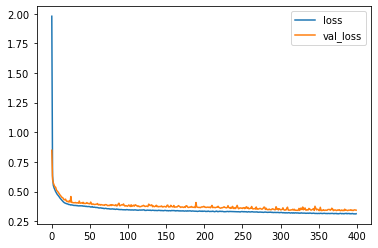

In [ ]:
history.plot()

In [ ]:
# Checking to see how good we did
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score, r2_score
import numpy as np

In [ ]:
predictions = model.predict(X_test)

In [ ]:
# R squared error
r2_score(y_test,predictions)

0.7471182892779807

In [ ]:
# Root mean squared error
np.sqrt(mean_squared_error(y_test,predictions))

0.5849859801201276

In [ ]:
mean_absolute_error(y_test,predictions)

0.4100455008087293

In [ ]:
# Explained variance score: Tells you how much variance is being explained by model
explained_variance_score(y_test,predictions)

0.749655970830179

In [ ]:
my_index = 101
single_house = cali.drop('SalePrice',axis=1).iloc[my_index]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1,8))

In [ ]:
model.predict(single_house)[0][0]

2.6933608

In [ ]:
cali['SalePrice'][my_index]

2.734

In [ ]:
print('Off by : $',round(abs((model.predict(single_house)[0][0]*100000) - (cali['SalePrice'][my_index]*100000)),2))

Off by : $ 4063.92


In [ ]:
model.save('/content/drive/My Drive/DATA/cali_test_model_v1.h5')
print('Saved')

Saved


In [ ]:
# -------------------------------- Training on whole data set---------------------------------------

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Fitting and transforming across whole data set
X = scaler.fit_transform(X)

In [ ]:
# Creating a sequential model
model = Sequential()

# Base # of neurons from size of feature data (# of features)

model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(X_train.shape[1],activation='relu'))

# Final layer: Outputs predicted price
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X,y=y,epochs=400)

Epoch 1/400
645/645 [==============================] - 1s 980us/step - loss: 2.4561
Epoch 2/400
645/645 [==============================] - 1s 1ms/step - loss: 0.6043
Epoch 3/400
645/645 [==============================] - 1s 1ms/step - loss: 0.5898
Epoch 4/400
645/645 [==============================] - 1s 1ms/step - loss: 0.5439
Epoch 5/400
645/645 [==============================] - 1s 1ms/step - loss: 0.5139
Epoch 6/400
645/645 [==============================] - 1s 995us/step - loss: 0.4988
Epoch 7/400
645/645 [==============================] - 1s 1ms/step - loss: 0.4907
Epoch 8/400
645/645 [==============================] - 1s 1ms/step - loss: 0.4866
Epoch 9/400
645/645 [==============================] - 1s 1ms/step - loss: 0.4584
Epoch 10/400
645/645 [==============================] - 1s 969us/step - loss: 0.4667
Epoch 11/400
645/645 [==============================] - 1s 990us/step - loss: 0.4876
Epoch 12/400
645/645 [==============================] - 1s 1ms/step - loss: 0.4423
Epoch

In [ ]:
predictions = model.predict(X)

In [ ]:
# R^2 error
r2_score(y,predictions)

0.76524377770531

In [ ]:
# Mean squared error
mse = mean_squared_error(y,predictions)
mse

0.312589718242566

In [ ]:
# Root mean squared error
np.sqrt(mse)

0.5590972350517984

In [ ]:
# Mean absolute error
mean_absolute_error(y,predictions)

0.3840703323795204

In [ ]:
# Explained variance score: Tells you how much variance is being explained by model
explained_variance_score(y,predictions)

0.7654070739008606

In [ ]:
my_index = 0
single_house = cali.drop('SalePrice',axis=1).iloc[my_index]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1,8))

In [ ]:
model.predict(single_house)[0][0]

4.161402

In [ ]:
cali['SalePrice'][my_index]

2.734

In [ ]:
print('Off by : $',round(abs((model.predict(single_house)[0][0]*100000) - (cali['SalePrice'][my_index]*100000)),2))

Off by : $ 22055.27


In [ ]:
model.save('/content/drive/My Drive/DATA/cali_model_v1.h5')
print('Saved')

Saved


In [ ]:
import joblib
joblib.dump(scaler,'/content/drive/My Drive/DATA/cali_model_v1.pkl')

['/content/drive/My Drive/DATA/cali_model_v1.pkl']